### Data Cleaning and Quality Assessment 

The first step towards generating useful insights from the data was the data prepartion, quality assessment and data cleaning.

In [46]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

### 1. Cleaning Customer Demographics Data

In [47]:
# Loading the Customer Demographics Data from the excel file
cust_demo = pd.read_excel('raw_data_99bikes.xlsx' , sheet_name='CustomerDemographic')

# Checking first 10 records from Customer Demographics Data
cust_demo.head(10)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [48]:
# Information of columns and data-types of Customer Demographics Data.

cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

Or following code giveout data types of each columns in an organized manner.

In [49]:
for column, dtype in zip(cust_demo.columns, cust_demo.dtypes):
    print(f"{column} : {dtype}")

customer_id : int64
first_name : object
last_name : object
gender : object
past_3_years_bike_related_purchases : int64
DOB : object
job_title : object
job_industry_category : object
wealth_segment : object
deceased_indicator : object
default : object
owns_car : object
tenure : float64


In [50]:
#Total Records
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


In [51]:
# Numeric Columns and Non-Numeric Columns
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


##### Dropping Irrelevent Columns

default is an irrelevent column. Hence it should be dropped.

In [52]:
# Dropping the default column

cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

##### Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [53]:
# Total number of missing values

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [54]:
# Percentage of missing values

cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Above it is observed that columns like gender, DOB, job_title, job_industry_category and tenure have missing values.

In [55]:
# Checking for the presence of first name and customer id in records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

In [56]:
# Fetching records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [57]:
cust_demo['last_name'].fillna('None',axis=0, inplace=True)

cust_demo['last_name'].isnull().sum()

0

Currently there are no missing values for last name column.

In [58]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [59]:
round(cust_demo['DOB'].isnull().mean()*100)

2

Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [60]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [61]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)
cust_demo['DOB'].isnull().sum()

0

In [62]:
# Convert 'DOB' column to datetime
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

Currently there are no missing values for DOB column.

##### Creating Age Column for checking further descripency in data


c:\Users\anokh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


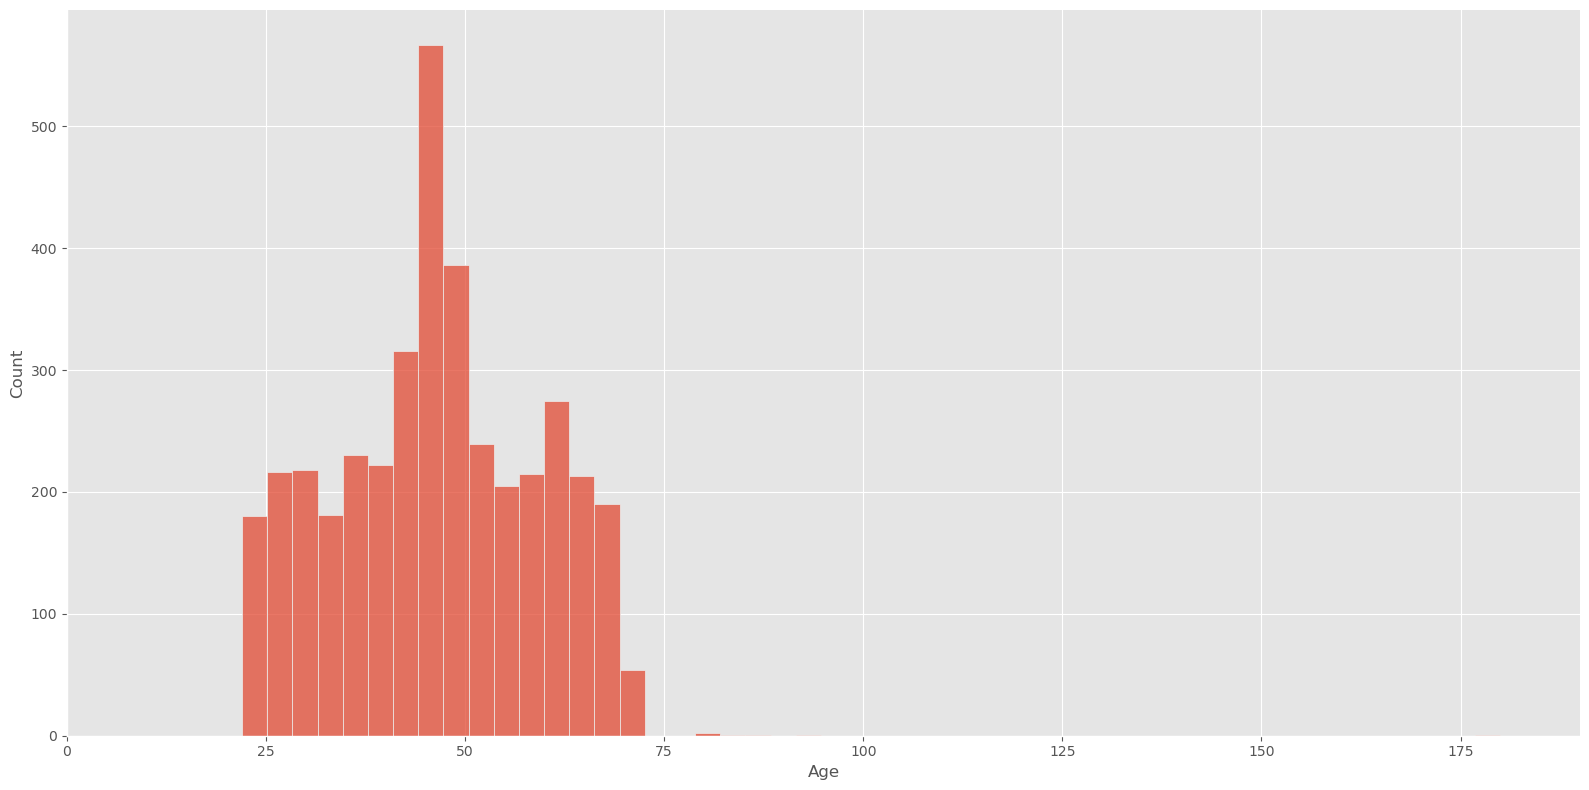

In [63]:
# Function to calculate the age as of today based on the DOB of the customer.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply the age function to the 'DOB' column
cust_demo['Age'] = cust_demo['DOB'].apply(age)

# Visualization to find out the Age Distribution using displot
g = sns.displot(cust_demo['Age'], kde=False, bins=50, height=8, aspect=2)
g.set(xlim=(0, 190))
plt.show()

In [64]:
# Statistics of the Age column

cust_demo['Age'].describe()

count    3913.000000
mean       46.590084
std        12.797607
min        22.000000
25%        37.000000
50%        47.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

Here we find there is only 1 customer with an age of 180. Clearly this is an outlier.

In [65]:
cust_demo[cust_demo['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


Here we see a customer with age 180 which is an outlier. hence we need to remove this record.

In [66]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

In [67]:
# checking tenure column

cust_demo['tenure'].isnull().sum()


0

There are no missing values for Tenure column.

In [68]:
# Fetching records where Job Title is missing.

cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,70
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,50
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,60


Since high amount of rows has missing job title, we will replace null value with 'Missing' instead of deleting/dropping rows.

In [72]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)
cust_demo['job_title'].isnull().sum()

0

In [73]:
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age


In [69]:
# Since Percentage of missing Job Industry Category is 16. We will replace null values with Missing

cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [70]:
cust_demo['job_industry_category'].isnull().sum()

0

In [74]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

Finally there are no missing values in the Customer Demoraphics data.

#### Inconsistency Check in Data
We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [75]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [76]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [77]:
cust_demo['gender'].value_counts()


gender
Female    2039
Male      1873
Name: count, dtype: int64

In [78]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [79]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

In [80]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

As above, there are no inconsistent data in columns: owns_car, deceased_indicator, wealth_segment.

#### Duplication Checks
We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function.

In [82]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id, duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id, duplicates : 3912
Number of records in original dataset : 3912


#### Exporting the Cleaned Customer Demographic Data Set to csv
Currently the Customer Demographics dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [83]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)

### 2. Cleaning New Customer List

In [85]:
# Loading the New Customer Data from the excel file

new_cust = pd.read_excel('raw_data_99bikes.xlsx' , sheet_name='NewCustomerList')

# Checking first 5 records from New Customer Data

new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [86]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [87]:
# Total Records

print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


In [88]:
# Numeric Columns and Non-Numeric Columns

# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


#### Dropping Irrelevent Columns

'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

In [89]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

#### Missing Values Check
Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped or an appropiate value will be imputed in the feature column with missing values.

In [90]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [91]:
# Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [92]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [93]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [94]:
new_cust['last_name'].fillna('None',axis=0, inplace=True)
new_cust['last_name'].isnull().sum()


0

In [95]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [96]:
round(new_cust['DOB'].isnull().mean()*100)

2

In [97]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [98]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)
new_cust['DOB'].isnull().sum()

0

Creating Age Column for checking further descripency in data

Here, the DOB (Date of Birth) column in the new_cust DataFrame contains date values as strings rather than datetime objects. We need to convert the DOB column from strings to datetime objects before applying the age function.

In [102]:
#  Convert 'DOB' column to datetime

new_cust['DOB'] = pd.to_datetime(new_cust['DOB'], errors='coerce')

In [104]:
# Function to find the age of customers as of today.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply the age function to the 'DOB' column
new_cust['Age'] = new_cust['DOB'].apply(age)

# Descriptive Statistics of Age column
new_cust['Age'].describe()

count    983.000000
mean      52.802645
std       17.066293
min       22.000000
25%       41.000000
50%       52.000000
75%       66.000000
max       86.000000
Name: Age, dtype: float64

Replacing the null values of job_title & job_industry_category with 'Missing'.

In [105]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)
new_cust['job_title'].isnull().sum()

0

In [106]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)
new_cust['job_industry_category'].isnull().sum()

0

There are no missing values in dataset now.

In [107]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
dtype: int64

#### Inconsistency Check in Data
We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [108]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [109]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [110]:
new_cust['deceased_indicator'].value_counts()


deceased_indicator
N    983
Name: count, dtype: int64

In [111]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

In [112]:
new_cust['state'].value_counts()


state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [113]:
new_cust['country'].value_counts()


country
Australia    983
Name: count, dtype: int64

In [114]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


In [115]:
new_cust[['address', 'postcode','state','country']].sort_values('address')


,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


In [116]:
new_cust['tenure'].describe()


count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

#### Duplication Checks

In [117]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


#### Exporting the Cleaned New Customers Data Set to csv

In [118]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)

### 3. Cleaning Transactions Data

In [120]:
# Loading the Transactions Data from the excel file

trans = pd.read_excel('raw_data_99bikes.xlsx' , sheet_name='Transactions')

# Checking first 5 records from Transactions Data

trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [121]:
# Information of columns and data-types of Transactions Data.

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [122]:
#Total Records

print("Total records (rows) in the dataset : {}".format(trans.shape[0]))
print("Total columns (features) in the dataset : {}".format(trans.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


In [123]:
# Numeric Columns and Non-Numeric Columns

# select numeric columns
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


#### Missing Value Check

In [124]:
# Total number of missing values

trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [125]:
# Percentage of missing values

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [129]:
# unique entries in the 'online_order' column

unique_entries = trans['online_order'].unique()
print(unique_entries)

[ 0.  1. nan]


In [131]:
most_freq_online_mode = trans['online_order'].mode()
print(most_freq_online_mode)

0    1.0
Name: online_order, dtype: float64


In [132]:
# Since 1 is the most frequent value of online order, We will do a mode imputation on this categorical value.

trans['online_order'].fillna(1, inplace=True)
trans['online_order'].isnull().sum()

0

It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.

In [133]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size',
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [135]:
records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [142]:
trans.isnull().sum()


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

#### Creating a new feature "Profit"
The Profit column will be the difference between the list price and the standard price of a product.

In [143]:
trans['Profit'] = trans['list_price']-trans['standard_cost']

c:\Users\anokh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x800 with 0 Axes>

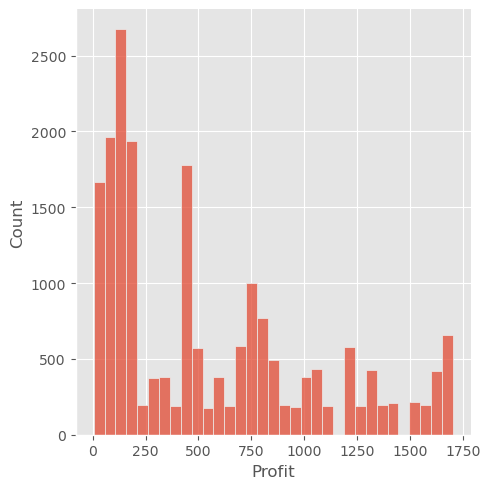

In [145]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.displot(trans['Profit'])

#### Inconsistency Check in Data

In [146]:
trans['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [147]:
trans['order_status'].value_counts()


order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [148]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


In [149]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [150]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [151]:
trans['product_size'].value_counts()


product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [152]:
trans['brand'].value_counts()


brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

#### Duplication Checks

In [153]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


In [154]:
trans.to_csv('Transactions_Cleaned.csv', index=False)

### 4. Cleaning Customer Address Data

In [155]:
# Loading the Customer Address Data from the excel file

cust_address = pd.read_excel('Raw_data_99bikes.xlsx' , sheet_name='CustomerAddress')

In [156]:
# Checking first 5 records from Customer Address Data

cust_address.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [157]:
# Information of columns and data-types of Customer Address Data.

cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [158]:
print("Total records (rows) in the dataset : {}".format(cust_address.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_address.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


In [159]:
# Numeric Columns and Non-Numeric Columns
# select numeric columns
df_numeric = cust_address.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_address.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are  : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'postcode' 'property_valuation']
The non-numeric columns are  : ['address' 'state' 'country']


#### Missing Values Check

In [160]:
# Total number of missing values
cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### Inconsistency Check in Data

In [161]:
cust_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

Here there are inconsistent data in State column. For New South Wales and Victoria we have two values, one being the full name and the other being their short name. The State names should be standardised and columns with state as New South Wales will be replaced by NSW and columns with state as Victoria will be replaced by VIC.

In [163]:
# Function to replace full state names with their short forms.

def replace_state_names(state_name):
    
    # Making Short Form of State Names as standards
    if state_name=='New South Wales':
        return 'NSW'
    elif state_name=='Victoria':
        return 'VIC'
    else :
        return state_name

# Applying the above fuction to state column
cust_address['state'] = cust_address['state'].apply(replace_state_names)

cust_address['state'].value_counts()


state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [164]:
cust_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [165]:
cust_address[['address','postcode', 'state' , 'country']].drop_duplicates()

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


#### Duplication Checks

In [166]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
cust_address_dedupped = cust_address.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_address.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3999
Number of records in original dataset : 3999


In [167]:
cust_address.to_csv('CustomerAddress_Cleaned.csv', index=False)

#### Checking for Master-Detail Record Counts:

Checking with the Master Table (CustomerDemographic_Cleaned.csv) containing the entire Customer Data for the Customer IDs which are getting dropped from the Customer Address Dataset.
Basically these are the Customers who have an address but are not a part of the Demographics dataset yet.

In [169]:
cust_demo_detail = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [170]:
print("Total Records in Customer_Demographic_Table : {}".format(cust_demo_detail.shape[0]))
print("Total Records in Customer_Address_Table : {}".format(cust_address.shape[0]))
print('In Demographic Table {} records are getting dropped due to data cleaning process in Demographic Table'
      .format(cust_address.shape[0]-cust_demo_detail.shape[0]))

Total Records in Customer_Demographic_Table : 3912
Total Records in Customer_Address_Table : 3999
In Demographic Table 87 records are getting dropped due to data cleaning process in Demographic Table


In [171]:
cust_drop = cust_address.merge(cust_demo_detail , left_on = 'customer_id', right_on='customer_id'
                     , how='outer')
cust_drop.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70.0
1,2,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43.0
2,4,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Talbot,NaN,Male,33.0,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62.0
3,5,17979 Del Mar Point,2448.0,NSW,Australia,4.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,47.0
4,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,Missing,Retail,High Net Worth,N,Yes,13.0,57.0
